#### RNN - LSTM 3 models

In [1]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import nltk
import re
import sklearn
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import wordcloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')

path_to_file = 'trainly1.csv'
data = pd.read_csv(path_to_file)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LeeEn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Drop empty rows
df = pd.read_csv("trainly1.csv")
original = df.shape[0]
pos, neg = df['label'].value_counts()
print('Total rows found:', original)
print('Sarcastic count:', pos, 'Non sarcastic count:', neg)

Total rows found: 1010745
Sarcastic count: 505405 Non sarcastic count: 505340


In [3]:
# Drop empty rows
df.dropna(inplace=True)

In [4]:
pos_r, neg_r = df['label'].value_counts()
print('Removed:', original - pos_r - neg_r)
print('Sarcastic count:', pos_r, 'Non sarcastic count:', neg_r)

Removed: 9429
Sarcastic count: 503708 Non sarcastic count: 497608


#### Visualize data

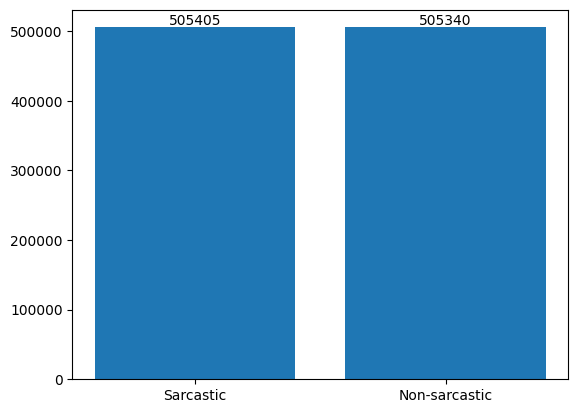

In [5]:
graph_labels = ['Sarcastic', 'Non-sarcastic']
graph_values = [pos, neg]

fig, ax = plt.subplots()
bars = ax.bar(graph_labels, graph_values)
ax.bar_label(bars)
plt.show()

In [6]:
w = ''

for x in range(df.shape[0]):
    row = df['comment_new'].iloc[x]
    w += ' '.join(word for word in row.split()) + ' '

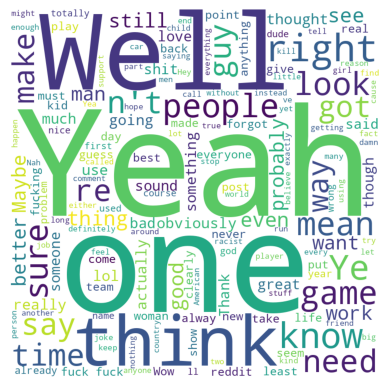

In [7]:
wc = wordcloud.WordCloud(width=800, 
                         height=800,
                         background_color='white',
                         min_font_size=15).generate(w)

plt.imshow(wc)
plt.axis('off')
plt.show()

#### Additional utility functions and definitions

In [8]:
TOTAL_WORDS = 10000
MAX_LEN = 50
EMBEDDING_SIZE = 300

In [9]:
stop_words = nltk.corpus.stopwords.words('english')

In [10]:
mispell_dict = {"ain't": "is not", "cannot": "can not", "aren't": "are not", "can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",
                "doesn't": "does not",
                "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did",
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am",
                "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "this's": "this is", "that'd": "that would",
                "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would",
                "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
                "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "wont": "will not", "won't've": "will not have", "would've": "would have",
                "wouldn't": "would not",
                "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
                "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'colour': 'color',
                'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor',
                'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What',
                'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I',
                'theBest': 'the best', 'howdoes': 'how does', 'Etherium': 'Ethereum',
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what',
                'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

mispell_dict = {k.lower(): v.lower() for k, v in mispell_dict.items()}

In [11]:
def preprocessing_text(s):
    # making our string lowercase & removing extra spaces
    s = str(s).lower().strip()
    
    # remove contractions.
    s = " ".join([mispell_dict[word] if word in mispell_dict.keys() else word for word in s.split()])
    
    # removing \n
    s = re.sub('\n', '', s)
    
    # put spaces before & after punctuations to make words seprate. Like "king?" to "king", "?".
    # s = re.sub(r"([?!,+=—&%\'\";:¿।।।|\(\){}\[\]//])", r" \1 ", s)
    
    # Remove punctuations
    s = re.sub('[^\w\s]', '', s)
    
    # Remove more than 2 continues spaces with 1 space.
    # s = re.sub('[ ]{2,}', ' ', s).strip()
    
    # Remove stopwords
    s = ' '.join(word for word in s.split() if word not in stop_words)
    
    return s

In [12]:
#F1 score function
def recall_s(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_s(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_s(y_true, y_pred)
    recall = recall_s(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

#### Preprocess data

In [13]:
# Comments
df['comment_new'].apply(preprocessing_text)

1              know west team play west team east team right
2          underdog earlier today since gronk announcemen...
3                         meme funny none new york nigga one
4                                         could use one tool
5                pay attention long legal kick bed took load
                                 ...                        
1010740    sure iran korea technology create pig bird hum...
1010741                                  whatever vote green
1010742    perhaps atheist conspiracy make christians loo...
1010743                      slavs got country called kosovo
1010744       value capitalism good money imprisoning people
Name: comment_new, Length: 1001316, dtype: object

In [14]:
# Author
df['author'].apply(lambda x: x.lower())

1               shbshb906
2                creepeth
3               icebrotha
4               cush2push
5             only7inches
                ...      
1010740         twarkmain
1010741          bcharvey
1010742    rebelcommander
1010743             catsi
1010744          frogking
Name: author, Length: 1001316, dtype: object

In [15]:
# Subreddit
df['subreddit'].apply(lambda x: x.lower())

1                         nba
2                         nfl
3          blackpeopletwitter
4          maddenultimateteam
5                   askreddit
                  ...        
1010740            reddit.com
1010741               climate
1010742               atheism
1010743             worldnews
1010744              politics
Name: subreddit, Length: 1001316, dtype: object

In [16]:
# Date YYYY-MM -> YYYYMM
df['date'].apply(lambda x: x.replace('-',''))

1          201611
2          201609
3          201610
4          201612
5          201609
            ...  
1010740    200904
1010741    200905
1010742    200901
1010743    200901
1010744    200901
Name: date, Length: 1001316, dtype: object

In [17]:
# Time DD/MM/YYYY HH:MM -> DDMMYYYHHMM
df['created_utc'].apply(lambda x: x.replace('-','')).apply(lambda x: x.replace(':','')).apply(lambda x: ''.join(x.split()))

1          20161101002410
2          20160922214537
3          20161018210347
4          20161230170013
5          20160902103508
                ...      
1010740    20090425004752
1010741    20090514222740
1010742    20090111002257
1010743    20090123211249
1010744    20090124062014
Name: created_utc, Length: 1001316, dtype: object

In [18]:
# Parent
df['parent_comment'].apply(lambda x: x.lower())

1          the blazers and mavericks (the wests 5 and 6 s...
2                                    they're favored to win.
3                                 deadass don't kill my buzz
4          yep can confirm i saw the tool they use for th...
5                           do you find ariana grande sexy ?
                                 ...                        
1010740    no one is calling this an engineered pathogen,...
1010741    in a move typical of their recent do-nothing a...
1010742    screw the disabled--i've got to get to church ...
1010743    i've always been unsettled by that. i hear a l...
1010744    why do the people who make our laws seem unabl...
Name: parent_comment, Length: 1001316, dtype: object

Splitting of data 80:10:10

In [19]:
# Get labels
labels = df['label']

# Split into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df, labels, test_size=0.2, random_state=17)
print('Number of training instances:',len(x_train), 'Number of testing instances:', len(x_test))

# Further split into validation and test
x_val, x_test, y_val, y_test = sklearn.model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=17)
print('Number of validation instances:', len(x_val), 'Number of testing instances:', len(x_test))

Number of training instances: 801052 Number of testing instances: 200264
Number of validation instances: 100132 Number of testing instances: 100132


In [20]:
# Initialize tokenizers
tokenizer_comment = Tokenizer()
tokenizer_author = Tokenizer()
tokenizer_subreddit = Tokenizer()
tokenizer_parent = Tokenizer()
tokenizer_date = Tokenizer()
tokenizer_created_time = Tokenizer()
tokenizer_overall_sentiment = Tokenizer()

In [21]:
# Comments feature
comment_ds = x_train['comment_new']
tokenizer_comment.fit_on_texts(comment_ds)

training_sequences_comment = tokenizer_comment.texts_to_sequences(comment_ds)
val_sequences_comment = tokenizer_comment.texts_to_sequences(x_val['comment_new'])
test_sequences_comment = tokenizer_comment.texts_to_sequences(x_test['comment_new'])

training_padded_comment = pad_sequences(training_sequences_comment, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_comment = pad_sequences(val_sequences_comment, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_comment = pad_sequences(test_sequences_comment, maxlen=MAX_LEN, padding='post', truncating='post')

In [22]:
# Author feature
author_ds = x_train['author']
tokenizer_author.fit_on_texts(author_ds)

training_sequences_author = tokenizer_author.texts_to_sequences(author_ds)
val_sequences_author = tokenizer_author.texts_to_sequences(x_val['author'])
test_sequences_author = tokenizer_author.texts_to_sequences(x_test['author'])

training_padded_author = pad_sequences(training_sequences_author, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_author = pad_sequences(val_sequences_author, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_author = pad_sequences(test_sequences_author, maxlen=MAX_LEN, padding='post', truncating='post')

In [23]:
# Subreddit feature
subreddit_ds = x_train['subreddit']

tokenizer_subreddit.fit_on_texts(subreddit_ds)

training_sequences_subreddit = tokenizer_subreddit.texts_to_sequences(subreddit_ds)
val_sequences_subreddit = tokenizer_subreddit.texts_to_sequences(x_val['subreddit'])
test_sequences_subreddit = tokenizer_subreddit.texts_to_sequences(x_test['subreddit'])

training_padded_subreddit = pad_sequences(training_sequences_subreddit, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_subreddit = pad_sequences(val_sequences_subreddit, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_subreddit = pad_sequences(test_sequences_subreddit, maxlen=MAX_LEN, padding='post', truncating='post')

In [24]:
# Parent feature
parent_comment_ds = x_train['parent_comment']

tokenizer_parent.fit_on_texts(parent_comment_ds)

training_sequences_parent_comment = tokenizer_parent.texts_to_sequences(parent_comment_ds)
val_sequences_parent_comment = tokenizer_parent.texts_to_sequences(x_val['parent_comment'])
test_sequences_parent_comment = tokenizer_parent.texts_to_sequences(x_test['parent_comment'])

training_padded_parent = pad_sequences(training_sequences_parent_comment, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_parent = pad_sequences(val_sequences_parent_comment, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_parent = pad_sequences(test_sequences_parent_comment, maxlen=MAX_LEN, padding='post', truncating='post')

In [25]:
# Date feature
date_ds = x_train['date']

tokenizer_date.fit_on_texts(date_ds)

training_sequences_date = tokenizer_date.texts_to_sequences(date_ds)
val_sequences_date = tokenizer_date.texts_to_sequences(x_val['date'])
test_sequences_date = tokenizer_date.texts_to_sequences(x_test['date'])

training_padded_date = pad_sequences(training_sequences_date, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_date = pad_sequences(val_sequences_date, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_date = pad_sequences(test_sequences_date, maxlen=MAX_LEN, padding='post', truncating='post')

In [26]:
# Time created feature
created_time_ds = x_train['created_utc']

tokenizer_date.fit_on_texts(created_time_ds)

training_sequences_created_time = tokenizer_created_time.texts_to_sequences(created_time_ds)
val_sequences_created_time = tokenizer_created_time.texts_to_sequences(x_val['created_utc'])
test_sequences_created_time = tokenizer_created_time.texts_to_sequences(x_test['created_utc'])

training_padded_created_time = pad_sequences(training_sequences_created_time, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_created_time = pad_sequences(val_sequences_created_time, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_created_time = pad_sequences(test_sequences_created_time, maxlen=MAX_LEN, padding='post', truncating='post')

In [27]:
# Sentiment feature
overall_sentiment_ds = x_train['Overall Sentiment']

tokenizer_overall_sentiment.fit_on_texts(overall_sentiment_ds)

training_sequences_overall_sentiment = tokenizer_overall_sentiment.texts_to_sequences(overall_sentiment_ds)
val_sequences_overall_sentiment = tokenizer_overall_sentiment.texts_to_sequences(x_val['Overall Sentiment'])
test_sequences_overall_sentiment = tokenizer_overall_sentiment.texts_to_sequences(x_test['Overall Sentiment'])

training_padded_overall_sentiment = pad_sequences(training_sequences_overall_sentiment, 
                                                  maxlen=MAX_LEN, padding='post', truncating='post')
val_padded_overall_sentiment = pad_sequences(val_sequences_overall_sentiment,
                                             maxlen=MAX_LEN, padding='post', truncating='post')
test_padded_overall_sentiment = pad_sequences(test_sequences_overall_sentiment,
                                             maxlen=MAX_LEN, padding='post', truncating='post')

#### LSTM feature inputs

In [28]:
# Comment input
comment_input = tf.keras.Input(shape=(MAX_LEN,), name="comments")
comment_layer = tf.keras.layers.Embedding(10000, 32)(comment_input)
comment_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,
                                               dropout=0.5,
                                               return_sequences=True,
                                               unit_forget_bias=True,
                                               activity_regularizer=tf.keras.regularizers.L2(0.001)))(comment_layer)
comment_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,
                                               dropout=0.5,
                                               return_sequences=True,
                                               unit_forget_bias=True,
                                               activity_regularizer=tf.keras.regularizers.L2(0.001)))(comment_layer)
comment_layer = tf.keras.layers.GlobalMaxPooling1D()(comment_layer)
comment_layer = tf.keras.layers.Dense(128, activation='relu')(comment_layer)
comment_layer = tf.keras.layers.Dropout(0.5)(comment_layer)
comment_layer = tf.keras.layers.Dense(1, activation='sigmoid')(comment_layer)

In [29]:
# Author input
author_input = tf.keras.Input(shape=(MAX_LEN,), name='author')
author_layer = tf.keras.layers.Embedding(100, 3)(author_input)
author_layer = tf.keras.layers.GlobalMaxPooling1D()(author_layer)
author_layer = tf.keras.layers.Dense(32, activation='relu')(author_layer)
author_layer = tf.keras.layers.Dropout(0.5)(author_layer)
author_layer = tf.keras.layers.Dense(1, activation='sigmoid')(author_layer)

In [30]:
# Subreddit input
subreddit_input = tf.keras.Input(shape=(MAX_LEN,), name='subreddit')
subreddit_layer = tf.keras.layers.Embedding(100, 3)(subreddit_input)
subreddit_layer = tf.keras.layers.GlobalMaxPooling1D()(subreddit_layer)
subreddit_layer = tf.keras.layers.Dense(32, activation='relu')(subreddit_layer)
subreddit_layer = tf.keras.layers.Dropout(0.5)(subreddit_layer)
subreddit_layer = tf.keras.layers.Dense(1, activation='sigmoid')(subreddit_layer)

In [31]:
# Parent input
parent_comment_input = tf.keras.Input(shape=(MAX_LEN,), name='parent_comment')
parent_comment_layer = tf.keras.layers.Embedding(100, 3)(parent_comment_input)
parent_comment_layer = tf.keras.layers.GlobalMaxPooling1D()(parent_comment_layer)
parent_comment_layer = tf.keras.layers.Dense(32, activation='relu')(parent_comment_layer)
parent_comment_layer = tf.keras.layers.Dropout(0.5)(parent_comment_layer)
parent_comment_layer = tf.keras.layers.Dense(1, activation='sigmoid')(parent_comment_layer)

In [32]:
# Date input
date_input = tf.keras.Input(shape=(MAX_LEN,), name='date')
date_layer = tf.keras.layers.Embedding(100, 3)(date_input)
date_layer = tf.keras.layers.GlobalMaxPooling1D()(date_layer)
date_layer = tf.keras.layers.Dense(32, activation='relu')(date_layer)
date_layer = tf.keras.layers.Dropout(0.5)(date_layer)
date_layer = tf.keras.layers.Dense(1, activation='sigmoid')(date_layer)

In [33]:
# Created time input
created_time_input = tf.keras.Input(shape=(MAX_LEN,), name='created_time')
created_time_layer = tf.keras.layers.Embedding(100, 3)(created_time_input)
created_time_layer = tf.keras.layers.GlobalMaxPooling1D()(created_time_layer)
created_time_layer = tf.keras.layers.Dense(32, activation='relu')(created_time_layer)
created_time_layer = tf.keras.layers.Dropout(0.5)(created_time_layer)
created_time_layer = tf.keras.layers.Dense(1, activation='sigmoid')(created_time_layer)

In [34]:
# Overall sentiment input
overall_sentiment_input = tf.keras.Input(shape=(MAX_LEN,), name='overall_sentiment')
overall_sentiment_layer = tf.keras.layers.Embedding(100, 3)(overall_sentiment_input)
overall_sentiment_layer = tf.keras.layers.GlobalMaxPooling1D()(overall_sentiment_layer)
overall_sentiment_layer = tf.keras.layers.Dense(32, activation='relu')(overall_sentiment_layer)
overall_sentiment_layer = tf.keras.layers.Dropout(0.5)(overall_sentiment_layer)
overall_sentiment_layer = tf.keras.layers.Dense(1, activation='sigmoid')(overall_sentiment_layer)

In [35]:
# Score input
score_input = tf.keras.Input(shape=(1,), name='score')
score_normalizer = tf.keras.layers.Normalization(axis=None)
score_normalizer.adapt(x_train['score'])
score_layer = score_normalizer(score_input)

In [36]:
# Child length input
c_length_input = tf.keras.Input(shape=(1,), name='c_length')
c_length_normalizer = tf.keras.layers.Normalization(axis=None)
c_length_normalizer.adapt(x_train['child_len'])
c_length_layer = c_length_normalizer(c_length_input)

In [37]:
# Parent length input
p_length_input = tf.keras.Input(shape=(1,), name='p_length')
p_length_normalizer = tf.keras.layers.Normalization(axis=None)
p_length_normalizer.adapt(x_train['parent_len'])
p_length_layer = p_length_normalizer(p_length_input)

In [38]:
# Distance_cp
distance_cp_input = tf.keras.Input(shape=(1,), name='distance_cp')
distance_cp_normalizer = tf.keras.layers.Normalization(axis=None)
distance_cp_normalizer.adapt(x_train['distance_cp'])
distance_cp_layer = distance_cp_normalizer(distance_cp_input)

In [39]:
# Sum_nv
sum_nv_input = tf.keras.Input(shape=(1,), name='sum_nv')
sum_nv_normalizer = tf.keras.layers.Normalization(axis=None)
sum_nv_normalizer.adapt(x_train['sum_nv'])
sum_nv_layer = sum_nv_normalizer(sum_nv_input)

In [40]:
# Sentiment score input
senti_score_input = tf.keras.Input(shape=(1,), name='senti_score')
senti_score_normalizer = tf.keras.layers.Normalization(axis=None)
senti_score_normalizer.adapt(x_train['senti_score'])
senti_score_layer = senti_score_normalizer(senti_score_input)

#### Bidrectional LSTM Model

In [41]:
x = tf.keras.layers.concatenate([comment_layer,
                                 author_layer,
                                 subreddit_layer,
                                 parent_comment_layer,
                                 date_layer,
                                 created_time_layer,
                                 overall_sentiment_layer,
                                 score_layer,
                                 c_length_layer,
                                 p_length_layer,
                                 distance_cp_layer,
                                 sum_nv_layer,
                                 senti_score_layer,
                                 ])

output = tf.keras.layers.Dense(1, name='output', activation='sigmoid')(x)

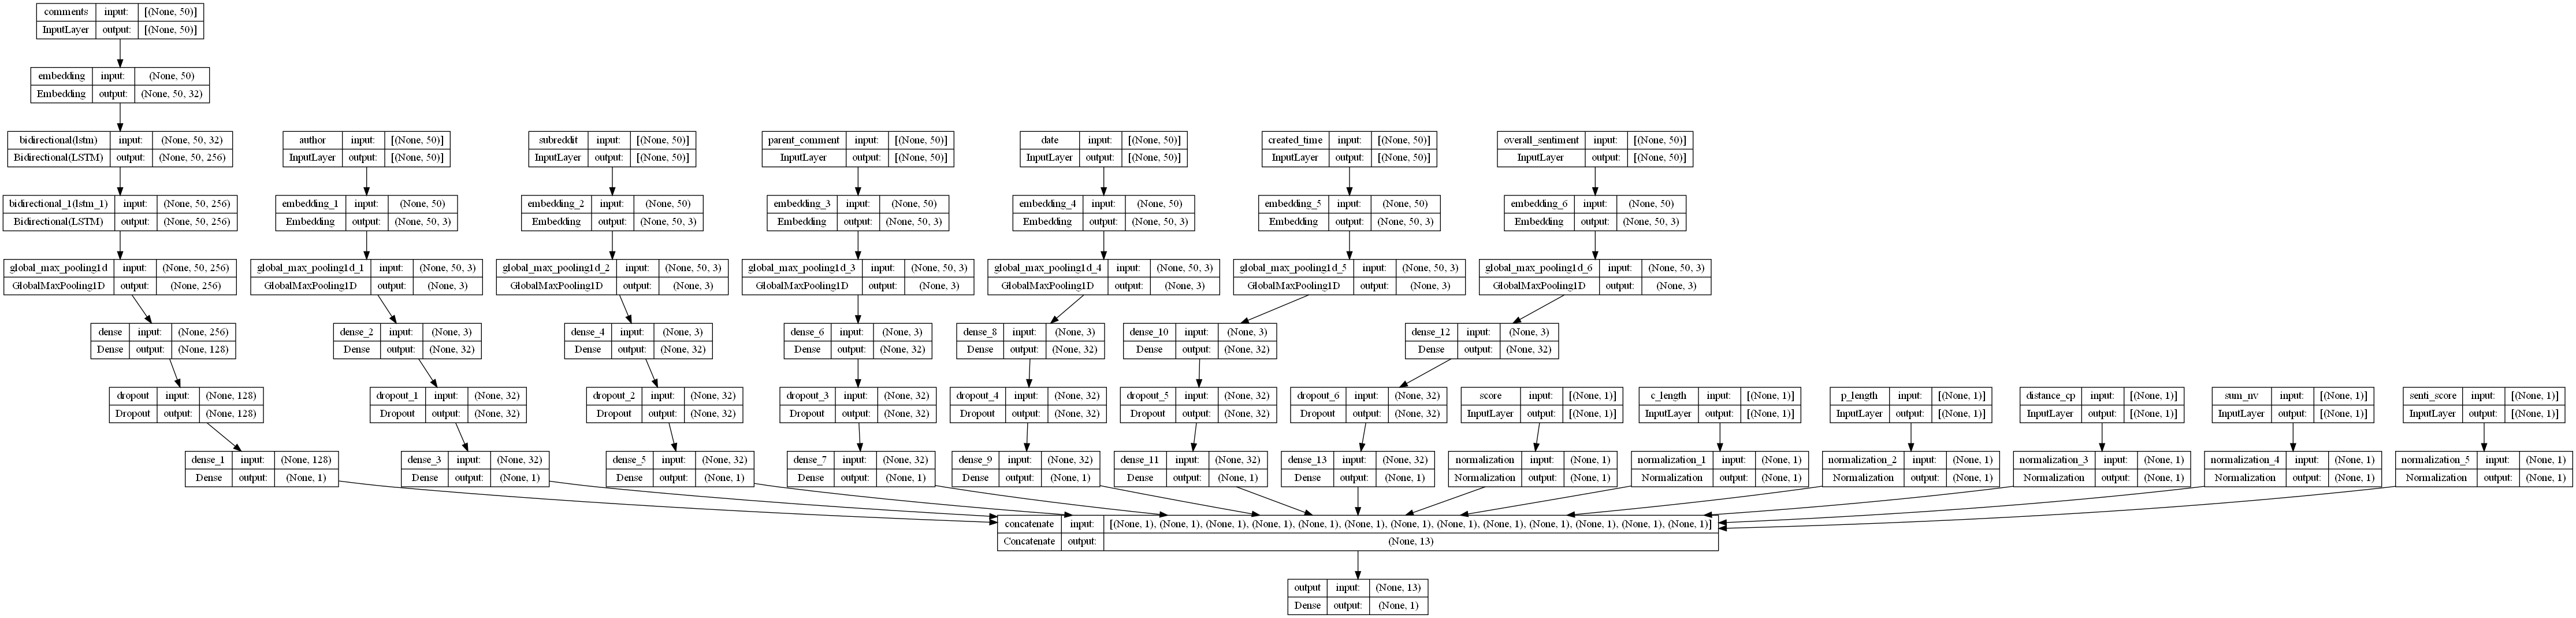

In [48]:
model = tf.keras.Model(
    inputs=[comment_input,
            author_input,
            subreddit_input,
            parent_comment_input,
            date_input,
            created_time_input,
            overall_sentiment_input,
            score_input,
            c_length_input,
            p_length_input,
            distance_cp_input,
            sum_nv_input,
            senti_score_input,
            ],
    outputs=[output]
)

tf.keras.utils.plot_model(model, 'lstm_all_features.png', show_shapes=True)

In [49]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=f1
)

In [50]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comments (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 32)       320000      ['comments[0][0]']               
                                                                                                  
 bidirectional (Bidirectional)  (None, 50, 256)      164864      ['embedding[0][0]']              
                                                                                                  
 author (InputLayer)            [(None, 50)]         0           []                               
                                                                                            

 dropout_6 (Dropout)            (None, 32)           0           ['dense_12[0][0]']               
                                                                                                  
 score (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 c_length (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 p_length (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 distance_cp (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 sum_nv (I

In [51]:
history = model.fit(
    {'comments': training_padded_comment,
     'author': training_padded_author,
     'subreddit': training_padded_subreddit,
     'parent_comment': training_padded_parent,
     'date': training_padded_date,
     'created_time': training_padded_created_time,
     'overall_sentiment': training_padded_overall_sentiment,
     'score': x_train['score'],
     'c_length': x_train['child_len'],
     'p_length': x_train['parent_len'],
     'distance_cp': x_train['distance_cp'],
     'sum_nv': x_train['sum_nv'],
     'senti_score': x_train['senti_score'],
    },
    {'output': y_train},
    validation_data=([val_padded_comment, 
                      val_padded_author, 
                      val_padded_subreddit,
                      val_padded_parent,
                      val_padded_date,
                      val_padded_created_time,
                      val_padded_overall_sentiment,
                      x_val['score'],
                      x_val['child_len'],
                      x_val['parent_len'],
                      x_val['distance_cp'],
                      x_val['sum_nv'],
                      x_val['senti_score'],
                     ], 
                      y_val),
    epochs=30,
    batch_size=64,
    callbacks=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=1,
        mode='auto'
    )
)

Epoch 1/30
12517/12517 [==============================] - 608s 48ms/step - loss: 0.5656 - f1: 0.6958 - val_loss: 0.5681 - val_f1: 0.6972
Epoch 2/30
12517/12517 [==============================] - 626s 50ms/step - loss: 0.5602 - f1: 0.7013 - val_loss: 0.5652 - val_f1: 0.6995
Epoch 3/30
12517/12517 [==============================] - 628s 50ms/step - loss: 0.5560 - f1: 0.7053 - val_loss: 0.5647 - val_f1: 0.6955
Epoch 4/30
12517/12517 [==============================] - 600s 48ms/step - loss: 0.5526 - f1: 0.7086 - val_loss: 0.5641 - val_f1: 0.6925
Epoch 5/30
12517/12517 [==============================] - 593s 47ms/step - loss: 0.5497 - f1: 0.7107 - val_loss: 0.5633 - val_f1: 0.6996
Epoch 6/30
12517/12517 [==============================] - 604s 48ms/step - loss: 0.5470 - f1: 0.7126 - val_loss: 0.5652 - val_f1: 0.6971
Epoch 7/30
12517/12517 [==============================] - 608s 49ms/step - loss: 0.5449 - f1: 0.7143 - val_loss: 0.5640 - val_f1: 0.6930
Epoch 8/30
12517/12517 [=================

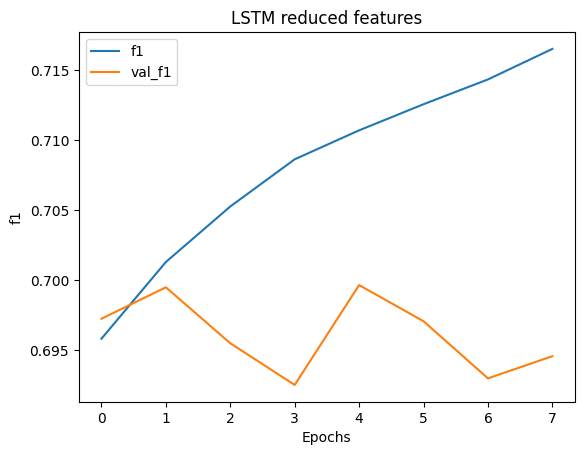

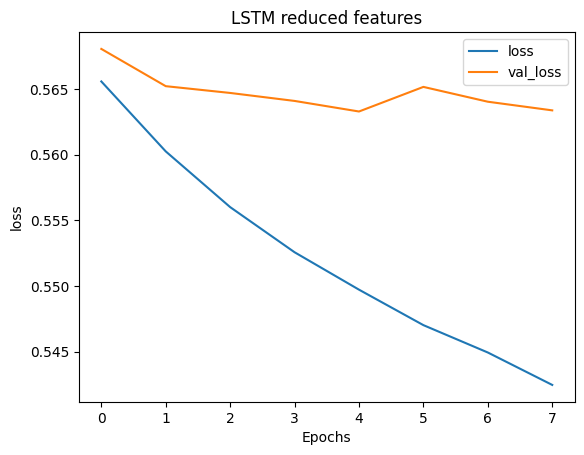

In [52]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title('LSTM Bidirectional')
    plt.show()

plot_graphs(history, "f1")
plot_graphs(history, "loss")

In [53]:
# Test the model
score = model.evaluate(
    {'comments': test_padded_comment,
     'author': test_padded_author,
     'subreddit': test_padded_subreddit,
     'parent_comment': test_padded_parent,
     'date': test_padded_date,
     'created_time': test_padded_date,
     'overall_sentiment': test_padded_overall_sentiment,
     'score': x_test['score'],
     'c_length': x_test['child_len'],
     'p_length': x_test['parent_len'],
     'distance_cp': x_test['distance_cp'],
     'sum_nv': x_test['sum_nv'],
     'senti_score': x_test['senti_score'],
    },
    {'output': y_test},
    batch_size=16,
    verbose=1,
)

6259/6259 [==============================] - 93s 15ms/step - loss: 0.5659 - f1: 0.6812


#### Single Bidirectional LSTM Model

In [79]:
comment_input = tf.keras.Input(shape=(MAX_LEN,), name='comments')
comment_layer = tf.keras.layers.Embedding(10000, 32)(comment_input)
comment_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True))(comment_layer)
comment_layer = tf.keras.layers.GlobalMaxPool1D()(comment_layer)
comment_layer = tf.keras.layers.Dense(64, activation="relu")(comment_layer)
comment_layer = tf.keras.layers.Dropout(0.5)(comment_layer)
comment_layer = tf.keras.layers.Dense(32, activation="relu")(comment_layer)
comment_layer = tf.keras.layers.Dropout(0.5)(comment_layer)
comment_layer = tf.keras.layers.Dense(1, activation="sigmoid")(comment_layer)

In [80]:
x = tf.keras.layers.concatenate([comment_layer,
                                 author_layer,
                                 subreddit_layer,
                                 parent_comment_layer,
                                 date_layer,
                                 created_time_layer,
                                 overall_sentiment_layer,
                                 score_layer,
                                 c_length_layer,
                                 p_length_layer,
                                 distance_cp_layer,
                                 sum_nv_layer,
                                 senti_score_layer,
                                 ])

output = tf.keras.layers.Dense(1, name='output', activation='sigmoid')(x)

In [81]:
model = tf.keras.Model(
    inputs=[comment_input,
            author_input,
            subreddit_input,
            parent_comment_input,
            date_input,
            created_time_input,
            overall_sentiment_input,
            score_input,
            c_length_input,
            p_length_input,
            distance_cp_input,
            sum_nv_input,
            senti_score_input,
            ],
    outputs=[output]
)

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=f1)

In [83]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comments (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding_13 (Embedding)       (None, 50, 32)       320000      ['comments[0][0]']               
                                                                                                  
 bidirectional_7 (Bidirectional  (None, 50, 128)     49664       ['embedding_13[0][0]']           
 )                                                                                                
                                                                                                  
 global_max_pooling1d_12 (Globa  (None, 128)         0           ['bidirectional_7[0][0]']  

 dropout_5 (Dropout)            (None, 32)           0           ['dense_10[0][0]']               
                                                                                                  
 dropout_6 (Dropout)            (None, 32)           0           ['dense_12[0][0]']               
                                                                                                  
 score (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 c_length (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 p_length (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 distance_

In [84]:
history = model.fit(
    {'comments': training_padded_comment,
     'author': training_padded_author,
     'subreddit': training_padded_subreddit,
     'parent_comment': training_padded_parent,
     'date': training_padded_date,
     'created_time': training_padded_created_time,
     'overall_sentiment': training_padded_overall_sentiment,
     'score': x_train['score'],
     'c_length': x_train['child_len'],
     'p_length': x_train['parent_len'],
     'distance_cp': x_train['distance_cp'],
     'sum_nv': x_train['sum_nv'],
     'senti_score': x_train['senti_score'],
    },
    {'output': y_train},
    validation_data=([val_padded_comment, 
                      val_padded_author, 
                      val_padded_subreddit,
                      val_padded_parent,
                      val_padded_date,
                      val_padded_created_time,
                      val_padded_overall_sentiment,
                      x_val['score'],
                      x_val['child_len'],
                      x_val['parent_len'],
                      x_val['distance_cp'],
                      x_val['sum_nv'],
                      x_val['senti_score'],
                     ], 
                      y_val),
    epochs=30,
    batch_size=64,
    callbacks=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=1,
        mode='auto'
    )
)

Epoch 1/30
12517/12517 [==============================] - 371s 29ms/step - loss: 0.6624 - f1: 0.6162 - val_loss: 0.6544 - val_f1: 0.6337
Epoch 2/30
12517/12517 [==============================] - 371s 30ms/step - loss: 0.6531 - f1: 0.6213 - val_loss: 0.6549 - val_f1: 0.6287
Epoch 3/30
12517/12517 [==============================] - 365s 29ms/step - loss: 0.6599 - f1: 0.6096 - val_loss: 0.6356 - val_f1: 0.6238
Epoch 4/30
12517/12517 [==============================] - 359s 29ms/step - loss: 0.6020 - f1: 0.6547 - val_loss: 0.5726 - val_f1: 0.6889
Epoch 5/30
12517/12517 [==============================] - 371s 30ms/step - loss: 0.5663 - f1: 0.6923 - val_loss: 0.5635 - val_f1: 0.7065
Epoch 6/30
12517/12517 [==============================] - 357s 29ms/step - loss: 0.5528 - f1: 0.7053 - val_loss: 0.5628 - val_f1: 0.6935
Epoch 7/30
12517/12517 [==============================] - 344s 27ms/step - loss: 0.5428 - f1: 0.7138 - val_loss: 0.5606 - val_f1: 0.7018
Epoch 8/30
12517/12517 [=================

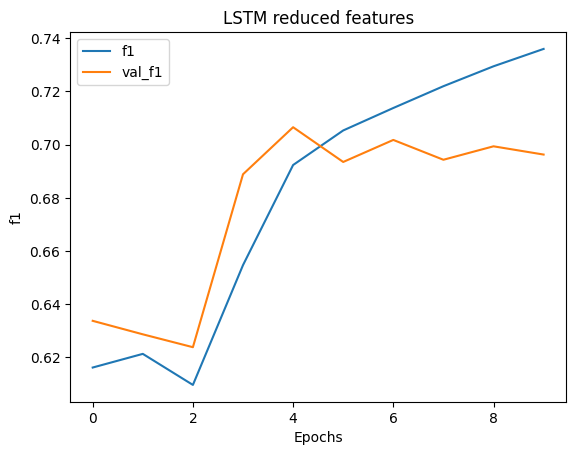

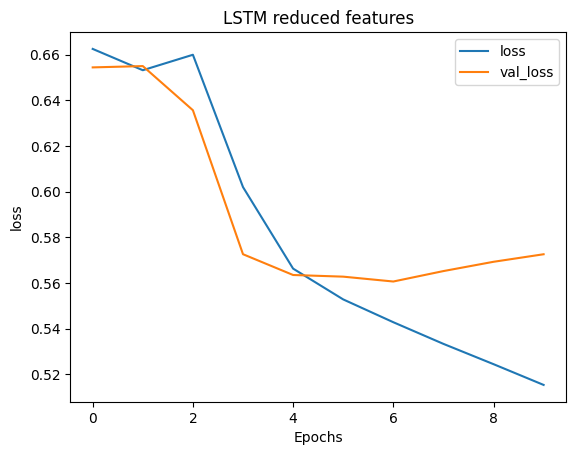

In [85]:
plot_graphs(history, "f1")
plot_graphs(history, "loss")

In [87]:
score = model.evaluate(
    {'comments': test_padded_comment,
     'author': test_padded_author,
     'subreddit': test_padded_subreddit,
     'parent_comment': test_padded_parent,
     'date': test_padded_date,
     'created_time': test_padded_date,
     'overall_sentiment': test_padded_overall_sentiment,
     'score': x_test['score'],
     'c_length': x_test['child_len'],
     'p_length': x_test['parent_len'],
     'distance_cp': x_test['distance_cp'],
     'sum_nv': x_test['sum_nv'],
     'senti_score': x_test['senti_score'],
    },
    {'output': y_test},
    batch_size=16,
    verbose=1,
)

6259/6259 [==============================] - 61s 10ms/step - loss: 0.5751 - f1: 0.6816


#### Simple Neural Network

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=f1
)

history = model.fit(training_padded_comment, 
                    y_train, 
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_padded_comment, y_val), 
                    verbose=1, 
                    callbacks=tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=3,
                        verbose=1,
                        mode='auto'
                    ))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 32)          320000    
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_35 (Dense)            (None, 128)               4224      
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 332,545
Trainable params: 332,545
Non-trainable params: 0
________________________________________________

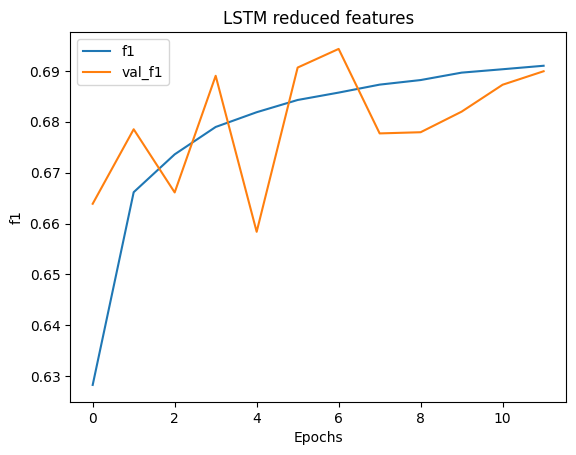

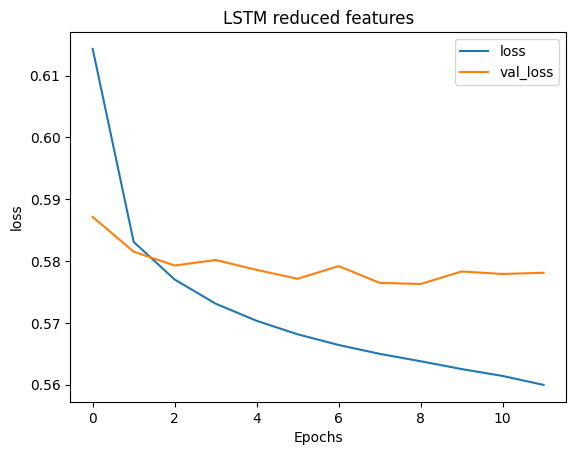

In [93]:
plot_graphs(history, "f1")
plot_graphs(history, "loss")

In [92]:
score = model.evaluate(test_padded_comment, 
                       y_test, 
                       batch_size=16, 
                       verbose=1)

6259/6259 [==============================] - 13s 2ms/step - loss: 0.5804 - f1: 0.6742


In [ ]:
# Save the model
model.save('rnn_all_features')

In [ ]:
# Load the model
model = tf.keras.models.load_model('rnn_multiple_features')
model.summary()